In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [9]:
def OxCGRT():
    path = "https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv"
    d = pd.read_csv(path, parse_dates=["Date"], index_col=None, low_memory=False)
    d[["CountryName", "RegionCode"]] = d[["CountryName", "RegionCode"]].fillna("")
    d["Cases"], d["Deaths"] = d.ConfirmedCases.fillna(0), d.ConfirmedDeaths.fillna(0)
    d["Date"] = pd.to_datetime(d["Date"], format="%Y-%m-%d")
    return d


def d_region(d, CountryName, RegionCode=""):
    return d[(d["CountryName"] == CountryName) & (d["RegionCode"] == RegionCode)].copy()


def d_diff(d, cols, dif=1):
    d = d.copy(deep=True)
    d[cols] = d[cols].diff(dif).fillna(0) / dif
    return d

def covid_plot(df):
    df = df.copy(deep=True)
    df1 = d_diff(df, ["Cases", "Deaths"])
    df7 = d_diff(df, ["Cases", "Deaths"], 7)
    
    # my personal plot theme, comment it 
    plt.style.use("../name-package/jz-white.mplstyle")

    colors = [mpl.colors.rgb2hex(plt.cm.get_cmap("Dark2", 8)(i)) for i in range(8)]
    
    mpl.rcParams["figure.dpi"] = 300
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 3))
    plt.subplots_adjust(wspace=0.1, hspace=0)
    plt.suptitle(region, y=1, fontweight="bold")

    plt.subplot(1, 2, 1)
    plt.bar(df1["Date"], df1["Cases"], color=colors[0])
    plt.plot(df7["Date"], df7["Cases"], color=colors[1])
    plt.ylim([0, 12000])
    plt.gca().spines["bottom"].set_position(("outward", 0))
    plt.xticks(rotation=45)
    plt.legend(["7-day Average", "Daily New Cases"], loc=(0.01, 0.77), ncol=1)

    plt.subplot(1, 2, 2)
    plt.bar(df1["Date"], df1["Deaths"], color=colors[0])
    plt.plot(df7["Date"], df7["Deaths"], color=colors[1])
    plt.ylim([0, 250])
    plt.gca().spines["bottom"].set_position(("outward", 0))
    plt.xticks(rotation=45)
    plt.legend(["7-day Average", "Daily New Deaths"], loc=(0.67, 0.77), ncol=1)
    plt.show()


def d_weekly(df):
    df = df.copy(deep=True)
    # get weekday column, weekday: Mon=1, Tue=2, ...., Sun=7
    df["day_of_week_for_end_date"] = df["Date"].dt.dayofweek + 1
    df[["Weekly_Total_New_Cases", "Weekly_Total_New_Deaths"]] = (
        df[["Cases", "Deaths"]].diff(7).fillna(0)
    )
    df["week_start_date"] = df["Date"] - timedelta(days=6)
    df = df.rename(columns={"Date": "week_end_date"})
    df = df[df["day_of_week_for_end_date"] == 5]
    cols = [
        "week_start_date",
        "week_end_date",
        "day_of_week_for_end_date",
        "Weekly_Total_New_Cases",
        "Weekly_Total_New_Deaths",
    ]
    df = df[cols].set_index(cols[:3])
    return df

In [3]:
D = OxCGRT()

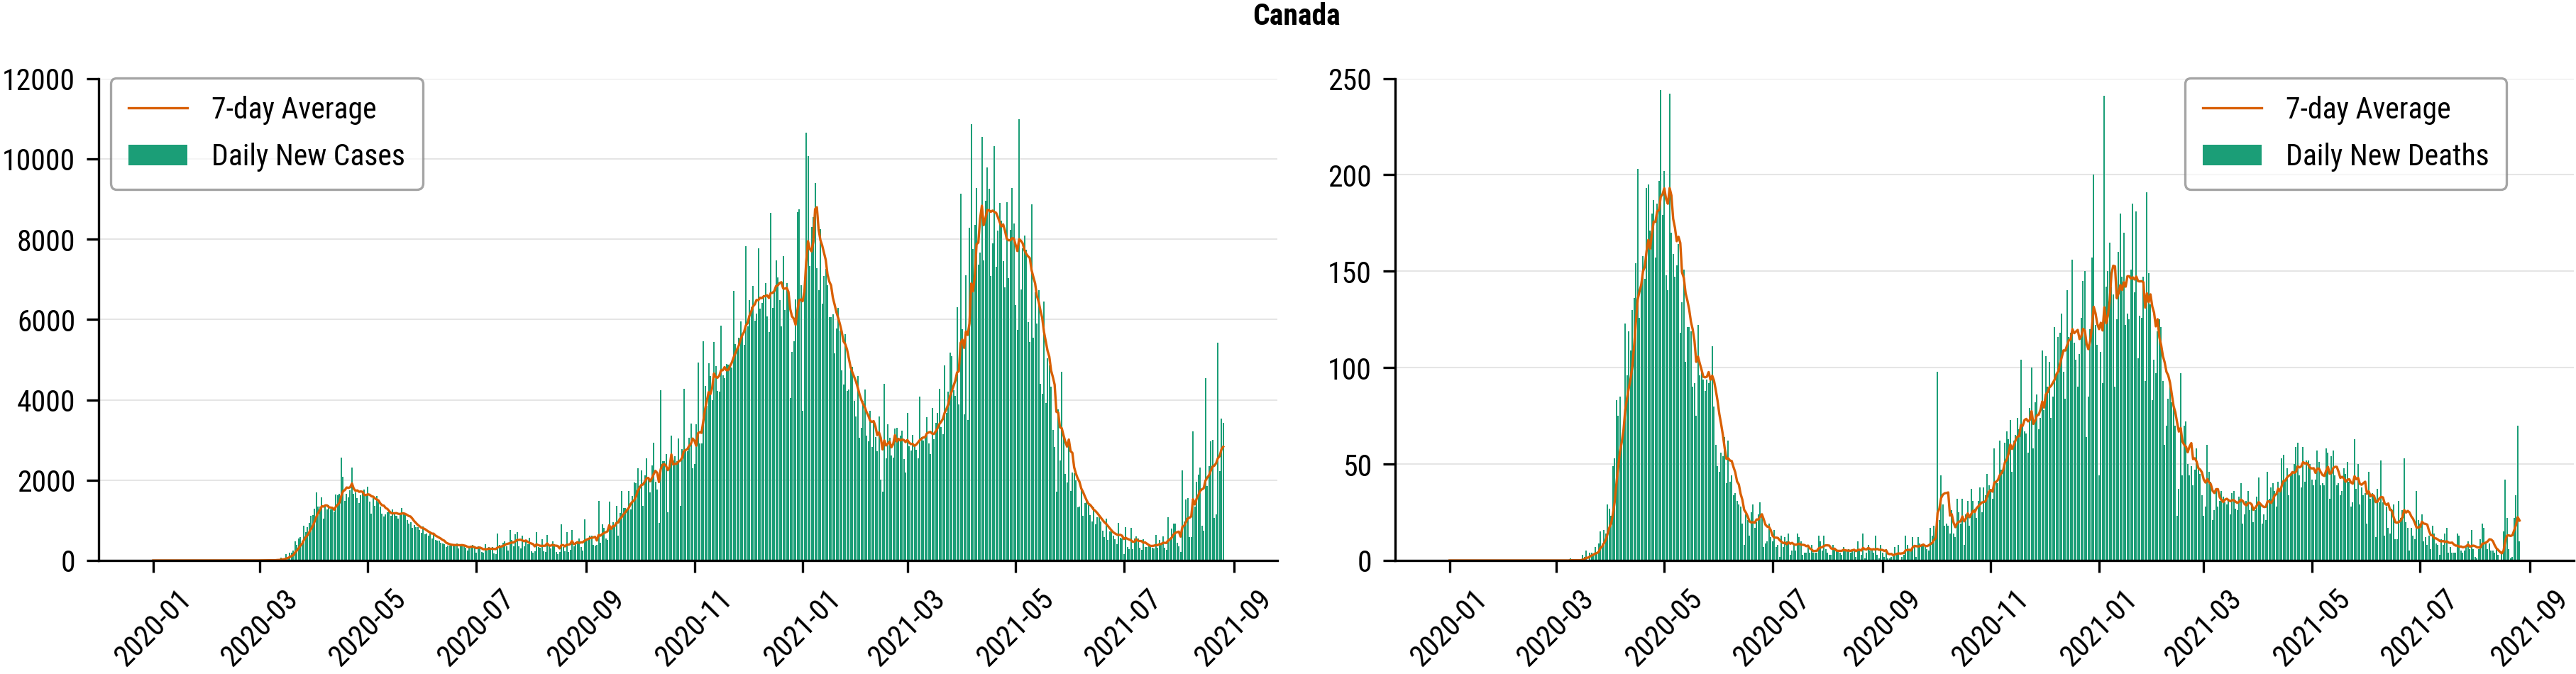

,,,Weekly_Total_New_Cases,Weekly_Total_New_Deaths
week_start_date,week_end_date,day_of_week_for_end_date,,
2019-12-28,2020-01-03,5,0.0,0.0
2020-01-04,2020-01-10,5,0.0,0.0
2020-01-11,2020-01-17,5,0.0,0.0
2020-01-18,2020-01-24,5,0.0,0.0
2020-01-25,2020-01-31,5,4.0,0.0
...,...,...,...,...
2021-07-17,2021-07-23,5,3073.0,50.0
2021-07-24,2021-07-30,5,4821.0,53.0
2021-07-31,2021-08-06,5,7309.0,62.0


In [10]:
region = "Canada"
d = d_region(D, region)

d = d[["Date", "Cases", "Deaths"]]

d = d[d["Date"] < (datetime.today() - timedelta(days=1)).strftime("%Y-%m-%d")]

covid_plot(d)


dw = d_weekly(d)

dw